Import all the libraries you require in the cell below.



In [ ]:
# Enter your code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn import tree

# Setting up personal configurations
pd.set_option('display.max_columns', None)

### 1. Build a classification model that predicts the edibility of mushrooms (class variable in the dataset). You have been provide with a dataset as a mushrooms.csv file. 
Here is a description of the attributes


Attribute description:
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
23. class: p = poisonous, e=edible


1. Build a classification tree. Random_state =2020. Training partition 0.7. stratify = y, max_depth = 6, use Entropy (8 marks)

A. Read the dataset, explore it and determine what is the dependent variable (1 mark)

B. Store the feature and target variable. (2 marks)

C. Convert all categorical variables into dummy variables (1 mark)

D. Partition the data into training and test sets (70/30) (1 mark)

E. Fit the training data to a classification tree. (3 marks)

In [ ]:
# Enter your code here
#A. Read the dataset, explore it and determine what is the dependent variable (1 mark)
df = pd.read_csv('mushrooms.csv')
#print(df.head()) # Exploring; as stated above, we are building model to predict edibility of mushrooms
# Therefore, predict ediblity represented as variable 'class' (p=poisonous, e=edible)

#B. Store the feature and target variable. (2 marks)
features = df.drop('class',axis=1,inplace=False) # store features separately for convenience
y = df['class'] # store target

#C. Convert all categorical variables into dummy variables (1 mark)
X = pd.get_dummies(features) # convert and store as X for use in partitioning

#D. Partition the data into training and test sets (70/30) (1 mark)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020, stratify=y)

#E. Fit the training data to a classification tree. (3 marks)
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=6)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

2. Print the confusion matrix. 
Also visualize the confusion matrix using plot_confusion_matrix from sklearn.metrics (3 marks)



[[1263    0]
 [   3 1172]]


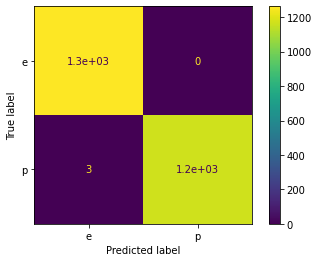

In [ ]:
# Enter your code here
# Confusion matrix
y_pred = dtc.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

# Confusion matrix visual using sklearn.metrics
metrics.plot_confusion_matrix(dtc, X_test, y_test)
plt.show()

3. Print the accuracy on the training partition?  (2 marks)


In [ ]:
# Enter your code here
dc = DummyClassifier(strategy='most_frequent')
dc.fit(X_train,y_train)
baseline = dc.score(X_test,y_test)
print('Training Accuracy =', baseline)

Training Accuracy = 0.5180475799835931


4. Print the accuracy on the test partition? (2 marks)


In [ ]:
# Enter your code here
print('Testing Accuracy =', metrics.accuracy_score(y_test, y_pred))

Testing Accuracy = 0.9987694831829368


5. Show the classification tree and save it (5 marks)


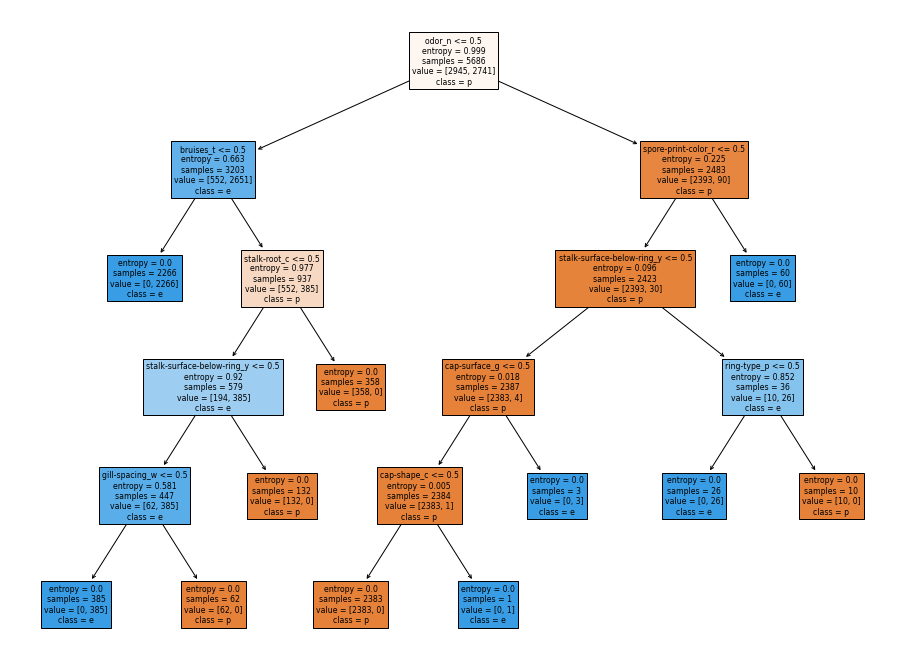

In [ ]:
# Enter your code here
plt.figure(2, figsize=[16,12])
fn = X.columns
cn = y.unique()
irisTree = tree.plot_tree(dtc, feature_names=fn, class_names=cn, filled=True)
plt.show()

6. Find and print the top three most important features in your decision tree for determining toxicity. (4 marks)

In [ ]:
# Enter your code here
print('First order variable: odor (whether or not it has one)')
print('Second order variable: bruises (whether or not it has them)')
print('Third order variable: spore color (whether or not they are green)')

First order variable: odor (whether or not it has one)
Second order variable: bruises (whether or not it has them)
Third order variable: spore color (whether or not they are green)


7. Classify the following mushroom. (6 marks)

class
 : **?**

cap-shape
: **x**

cap-surface
: **s**

cap-color
: **n**

bruises
: **t**

odor
: **y**

gill-attachment
: **f**

gill-spacing
: **c**

gill-size
: **n**

gill-color
: **k**

stalk-shape
: **e**

stalk-root
: **e**

stalk-surface-above-ring
: **s**

stalk-surface-below-ring
: **s**

stalk-color-above-ring
: **w**

stalk-color-below-ring
: **w**

veil-type
: **p**

veil-color
: **w**

ring-number
: **o**

ring-type
: **p**

spore-print-color
: **r**

population
: **s**

habitat
: **u**



In [ ]:
# Enter your code here
test = {'bruises_f': [0],
 'bruises_t': [1],
 'cap-color_b': [0],
 'cap-color_c': [0],
 'cap-color_e': [0],
 'cap-color_g': [0],
 'cap-color_n': [1],
 'cap-color_p': [0],
 'cap-color_r': [0],
 'cap-color_u': [0],
 'cap-color_w': [0],
 'cap-color_y': [0],
 'cap-shape_b': [0],
 'cap-shape_c': [0],
 'cap-shape_f': [0],
 'cap-shape_k': [0],
 'cap-shape_s': [0],
 'cap-shape_x': [1],
 'cap-surface_f': [0],
 'cap-surface_g': [0],
 'cap-surface_s': [1],
 'cap-surface_y': [0],
 'gill-attachment_a': [0],
 'gill-attachment_f': [1],
 'gill-color_b': [0],
 'gill-color_e': [0],
 'gill-color_g': [0],
 'gill-color_h': [0],
 'gill-color_k': [1],
 'gill-color_n': [0],
 'gill-color_o': [0],
 'gill-color_p': [0],
 'gill-color_r': [0],
 'gill-color_u': [0],
 'gill-color_w': [0],
 'gill-color_y': [0],
 'gill-size_b': [0],
 'gill-size_n': [1],
 'gill-spacing_c': [1],
 'gill-spacing_w': [0],
 'habitat_d': [0],
 'habitat_g': [0],
 'habitat_l': [0],
 'habitat_m': [0],
 'habitat_p': [0],
 'habitat_u': [1],
 'habitat_w': [0],
 'odor_a': [0],
 'odor_c': [0],
 'odor_f': [0],
 'odor_l': [0],
 'odor_m': [0],
 'odor_n': [0],
 'odor_p': [0],
 'odor_s': [0],
 'odor_y': [1],
 'population_a': [0],
 'population_c': [0],
 'population_n': [0],
 'population_s': [1],
 'population_v': [0],
 'population_y': [0],
 'ring-number_n': [0],
 'ring-number_o': [1],
 'ring-number_t': [0],
 'ring-type_e': [0],
 'ring-type_f': [0],
 'ring-type_l': [0],
 'ring-type_n': [0],
 'ring-type_p': [1],
 'spore-print-color_b': [0],
 'spore-print-color_h': [0],
 'spore-print-color_k': [0],
 'spore-print-color_n': [0],
 'spore-print-color_o': [0],
 'spore-print-color_r': [1],
 'spore-print-color_u': [0],
 'spore-print-color_w': [0],
 'spore-print-color_y': [0],
 'stalk-color-above-ring_b': [0],
 'stalk-color-above-ring_c': [0],
 'stalk-color-above-ring_e': [0],
 'stalk-color-above-ring_g': [0],
 'stalk-color-above-ring_n': [0],
 'stalk-color-above-ring_o': [0],
 'stalk-color-above-ring_p': [0],
 'stalk-color-above-ring_w': [1],
 'stalk-color-above-ring_y': [0],
 'stalk-color-below-ring_b': [0],
 'stalk-color-below-ring_c': [0],
 'stalk-color-below-ring_e': [0],
 'stalk-color-below-ring_g': [0],
 'stalk-color-below-ring_n': [0],
 'stalk-color-below-ring_o': [0],
 'stalk-color-below-ring_p': [0],
 'stalk-color-below-ring_w': [1],
 'stalk-color-below-ring_y': [0],
 'stalk-root_?': [0],
 'stalk-root_b': [0],
 'stalk-root_c': [0],
 'stalk-root_e': [1],
 'stalk-root_r': [0],
 'stalk-shape_e': [1],
 'stalk-shape_t': [0],
 'stalk-surface-above-ring_f': [0],
 'stalk-surface-above-ring_k': [0],
 'stalk-surface-above-ring_s': [1],
 'stalk-surface-above-ring_y': [0],
 'stalk-surface-below-ring_f': [0],
 'stalk-surface-below-ring_k': [0],
 'stalk-surface-below-ring_s': [1],
 'stalk-surface-below-ring_y': [0],
 'veil-color_n': [0],
 'veil-color_o': [0],
 'veil-color_w': [1],
 'veil-color_y': [0],
 'veil-type_p': [1]}
test1 = pd.DataFrame(test)
print(dtc.predict(test1))

['p']
